### DBSCAN Source Code

In [35]:
class dbscan:
    eps = None
    minpts = None
    def __init__(self,eps,minpts):
        self.eps = eps
        self.minpts = minpts
    def fit_predict(self,x):
        import numpy as np
        import sys
        def distance(pt,x):
            '''
            pt: 1-dimension array that represents the feature vector of a singe data point.
            x: 2-dimension array that is the feature vectors of all data points.
            output: return an 1-dimension array containing the L2 distances between 'pt' and each point in 'x'. 
            '''
            res = np.sqrt(np.sum((x-pt)**2,axis = 1))
            return res
            
        def neighbors(pt_index,x):
            '''
            pt_index: the int index of a singe data point.
            x: same as above.
            output: return index of all data points in the neighborhood of point with index 'pt_index' if this point is a core point, 
            else return empty list.
            '''       
            distances = distance(x[pt_index],x)
            neighbors = x_index[distances <= self.eps]
            if neighbors.shape[0] >= self.minpts:
                return list(neighbors)
            else:
                return []
                    
        def init_point_index(x):
            '''
            x: same as above.
            output: return the feature vector of a core point as the initial point of a cluster going to be expanded.
            '''
            # Search until find a core point as the initial point with just a few iterations
            # instead of calculate all the core points and select one randomly.
            for pt_index in x_index:
                nb = neighbors(pt_index,x)
                if len(nb) != 0:
                    return pt_index
            
        def cluster(pt_index,x):
            '''
            pt_index: the index of initial point.
            x: same as above.
            output: return the index of point clustered together.
            '''
            sys.setrecursionlimit(int(1e8)) # Cancel the limit of function recursion
            cluster_pts_index = [] # set 'cluster_pts_index' empty to avoid duplicate addition.
            nbs = neighbors(pt_index,x)
            for neighbor in nbs:
                if mark[neighbor] == 0: # if this point is not marked,then mark it so that no need to treat it next time.
                    mark[neighbor] = 1
                    cluster_pts_index += [neighbor] + cluster(neighbor,x) # Function recursion applied to search all the points in a cluster. 
            return cluster_pts_index

        def remove(cluster_pts_index,x):
            '''
            cluster_index_pts: the index of point clustered together.
            output: return a 2-dimension array of featvectors of data points after removing the points 
            corrsponding to 'cluster_pts_index from 'x'.
            '''
            res = set(range(len(x))) - set(cluster_pts_index)
            res = [list(x[i]) for i in list(res)] 
            return np.array(res)

        result = {}
        i = 0 
            
        while True:
            x_index = np.arange(len(x)) # Each sample feature veactor is transformed into its index with respect to 'x' 
                                        # for the convenience of calculation.
            i += 1
            init_pt = init_point_index(x)
            if init_point_index(x) == None: # If there is no point in 'x' is core point, the rest points are thought to be noise.
                result['Noise'] = [list(item) for item in x]
                break
            mark=[0] * len(x) # Define mark list, '0' represents unmarked, '1' represents marked.
            cluster_pts_index = cluster(init_pt,x)
            cluster_pts = [list(x[pt_index]) for pt_index in cluster_pts_index] # Transform back the index into feature vectors.       
            result[f'cluster {i}'] = cluster_pts
            x=remove(cluster_pts_index,x) # Remove the current found cluster points and select the initial point in the rest points for next cluster.
            
        return result
        

### Test with dataset 'iris' (30-150 size)

dict_keys(['cluster 1', 'cluster 2', 'Noise'])


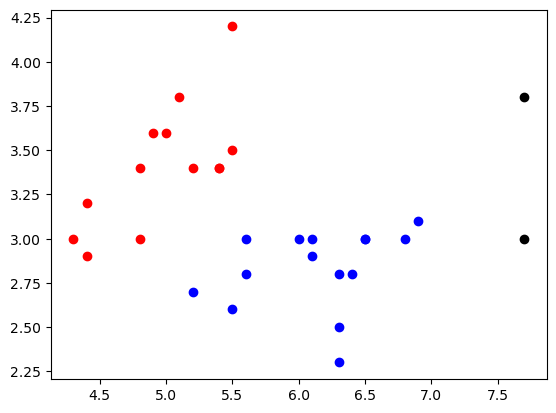

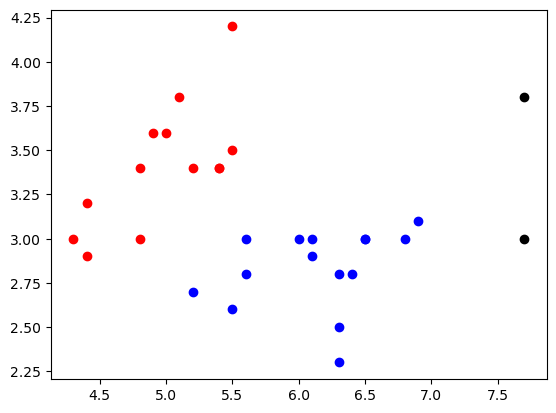

In [37]:
# My result
from sklearn.datasets import load_iris
import numpy as np
seed=123
x = load_iris().data
y = load_iris().target
x_index = np.arange(x.shape[0])
x = x[np.random.RandomState(seed).choice(x_index,30,replace=False)]
clf = dbscan(1,3)
result = clf.fit_predict(x)
import matplotlib.pyplot as plt
print(result.keys())
fig,ax = plt.subplots()
if len(result['cluster 1']) != 0 :
    ax.scatter(np.array(result['cluster 1'])[:,0],np.array(result['cluster 1'])[:,1],color = 'blue')
if len(result['cluster 2']) != 0 :
    ax.scatter(np.array(result['cluster 2'])[:,0],np.array(result['cluster 2'])[:,1],color = 'red')
if len(result['Noise']) != 0 :
    ax.scatter(np.array(result['Noise'])[:,0],np.array(result['Noise'])[:,1],color = 'black')

# Result from sklearn
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np
x = load_iris().data
y = load_iris().target
x = x[np.random.RandomState(seed).choice(x_index,30,replace=False)]
clf = DBSCAN(eps=1,min_samples=3)
result = clf.fit_predict(x)
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.scatter(x[result == 0][:,0],x[result == 0][:,1],color = 'blue')
ax.scatter(x[result == 1][:,0],x[result == 1][:,1],color = 'red')
ax.scatter(x[result == -1][:,0],x[result == -1][:,1],color = 'black')

### Test with dataset 'iris' (15000 size) 

Speed: 10.561747789382935 (s)
Sample Size: 15000
Speed: 0.8431787490844727 (s)
Sample Size: 15000


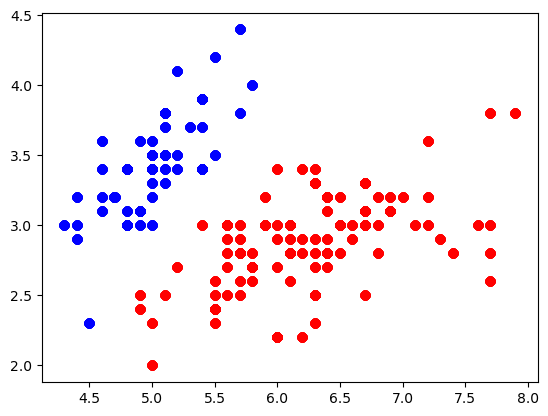

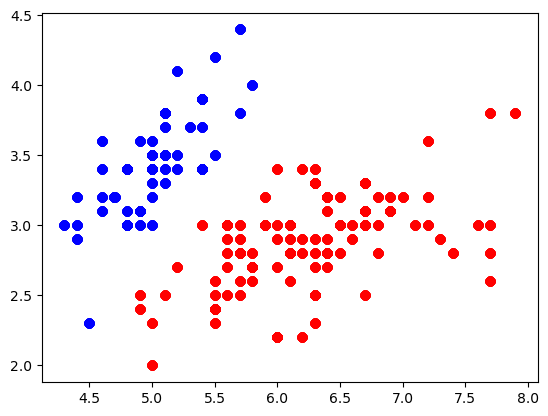

In [39]:
# My result
from sklearn.datasets import load_iris
import numpy as np
import time
start = time.time()
x = load_iris().data
t = tuple([x+np.array([i * 1e-6] * 4) for i in range(0,100)])
sample_size = len(t[0]) * len(t)
x = np.concatenate(t,axis=0)
clf = dbscan(1,3)
result = clf.fit_predict(x)
end=time.time()
import matplotlib.pyplot as plt
Time=end-start
print(f'Speed: {Time} (s)')
print(f'Sample Size: {sample_size}')
fig,ax = plt.subplots()
if len(result['cluster 1']) != 0 :
    ax.scatter(np.array(result['cluster 1'])[:,0],np.array(result['cluster 1'])[:,1],color = 'blue')
if len(result['cluster 2']) != 0 :
    ax.scatter(np.array(result['cluster 2'])[:,0],np.array(result['cluster 2'])[:,1],color = 'red')
if len(result['Noise']) != 0 :
    ax.scatter(np.array(result['Noise'])[:,0],np.array(result['Noise'])[:,1],color = 'black')

# Result from sklearn
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np
import time
start = time.time()
x = load_iris().data
t = tuple([x+np.array([i * 1e-6] * 4) for i in range(0,100)])
sample_size=len(t[0]) * len(t)
x = np.concatenate(t,axis=0)
clf = DBSCAN(eps=1,min_samples=3)
result = clf.fit_predict(x)
end = time.time()
Time = end-start
print(f'Speed: {Time} (s)')
print(f'Sample Size: {sample_size}')
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(x[result == 0][:,0],x[result == 0][:,1],color = 'blue')
ax.scatter(x[result == 1][:,0],x[result == 1][:,1],color = 'red')
ax.scatter(x[result == -1][:,0],x[result == -1][:,1],color = 'black')